In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import pandas_ta as ta

In [2]:
train = pd.read_pickle('./train_기술적분석_다중공선성처리완료.pkl')
train

,ticker,firm,volume,open,high,low,close,adjustTrue,OBV,EFI_13,VTXM_14,ROC_10,DMN_14,BBB_5_2.0,ADX_14,RSI_14,BBP_5_2.0,target
date,,,,,,,,,,,,,,,,,,
2022-03-23,A000020,동화약품,396150.0,13800.0,14100.0,13600.0,13650.0,1,42438463.0,2.075979e+08,0.842424,6.225681,13.516124,8.314381,20.440277,57.582117,0.360653,12950.0
2022-03-24,A000020,동화약품,164839.0,13600.0,13700.0,13500.0,13600.0,1,42273624.0,1.767636e+08,0.913043,5.426357,14.393671,8.062743,21.452135,56.778953,0.302562,13200.0
2022-03-25,A000020,동화약품,248995.0,13700.0,13950.0,13500.0,13900.0,1,42522619.0,1.621829e+08,0.872727,8.171206,13.600975,3.520188,22.711743,60.352263,0.851733,13250.0
2022-03-28,A000020,동화약품,160036.0,13900.0,13900.0,13600.0,13750.0,1,42362583.0,1.355845e+08,0.901235,9.561753,13.083657,3.115121,23.881378,57.780044,0.593659,13200.0
2022-03-29,A000020,동화약품,160334.0,13850.0,14000.0,13650.0,13750.0,1,42362583.0,1.162153e+08,0.868750,7.003891,12.486931,2.999455,25.101498,57.780044,0.548564,13200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-28,A383800,LX홀딩스,135534.0,8570.0,8580.0,8500.0,8520.0,1,-11706153.0,4.007800e+05,0.949640,-1.160093,13.018217,0.909082,24.599417,46.514283,0.345287,8330.0
2023-05-02,A383800,LX홀딩스,67407.0,8530.0,8570.0,8520.0,8540.0,1,-11638746.0,5.361172e+05,0.955224,-1.385681,12.519121,0.749590,24.492620,48.447100,0.531250,8300.0
2023-05-03,A383800,LX홀딩스,132215.0,8540.0,8620.0,8520.0,8560.0,1,-11506531.0,8.372861e+05,1.059829,-0.465116,11.564209,0.700521,25.011530,50.378222,0.733854,8310.0


In [3]:
train.index

Index(['2022-03-23', '2022-03-24', '2022-03-25', '2022-03-28', '2022-03-29',
       '2022-03-30', '2022-03-31', '2022-04-01', '2022-04-04', '2022-04-05',
       ...
       '2023-04-21', '2023-04-24', '2023-04-25', '2023-04-26', '2023-04-27',
       '2023-04-28', '2023-05-02', '2023-05-03', '2023-05-04', '2023-05-08'],
      dtype='object', name='date', length=548161)

In [4]:
train.columns

Index(['ticker', 'firm', 'volume', 'open', 'high', 'low', 'close',
       'adjustTrue', 'OBV', 'EFI_13', 'VTXM_14', 'ROC_10', 'DMN_14',
       'BBB_5_2.0', 'ADX_14', 'RSI_14', 'BBP_5_2.0', 'target'],
      dtype='object')

In [5]:
train  # target : 15일 뒤 실제 종가

,ticker,firm,volume,open,high,low,close,adjustTrue,OBV,EFI_13,VTXM_14,ROC_10,DMN_14,BBB_5_2.0,ADX_14,RSI_14,BBP_5_2.0,target
date,,,,,,,,,,,,,,,,,,
2022-03-23,A000020,동화약품,396150.0,13800.0,14100.0,13600.0,13650.0,1,42438463.0,2.075979e+08,0.842424,6.225681,13.516124,8.314381,20.440277,57.582117,0.360653,12950.0
2022-03-24,A000020,동화약품,164839.0,13600.0,13700.0,13500.0,13600.0,1,42273624.0,1.767636e+08,0.913043,5.426357,14.393671,8.062743,21.452135,56.778953,0.302562,13200.0
2022-03-25,A000020,동화약품,248995.0,13700.0,13950.0,13500.0,13900.0,1,42522619.0,1.621829e+08,0.872727,8.171206,13.600975,3.520188,22.711743,60.352263,0.851733,13250.0
2022-03-28,A000020,동화약품,160036.0,13900.0,13900.0,13600.0,13750.0,1,42362583.0,1.355845e+08,0.901235,9.561753,13.083657,3.115121,23.881378,57.780044,0.593659,13200.0
2022-03-29,A000020,동화약품,160334.0,13850.0,14000.0,13650.0,13750.0,1,42362583.0,1.162153e+08,0.868750,7.003891,12.486931,2.999455,25.101498,57.780044,0.548564,13200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-28,A383800,LX홀딩스,135534.0,8570.0,8580.0,8500.0,8520.0,1,-11706153.0,4.007800e+05,0.949640,-1.160093,13.018217,0.909082,24.599417,46.514283,0.345287,8330.0
2023-05-02,A383800,LX홀딩스,67407.0,8530.0,8570.0,8520.0,8540.0,1,-11638746.0,5.361172e+05,0.955224,-1.385681,12.519121,0.749590,24.492620,48.447100,0.531250,8300.0
2023-05-03,A383800,LX홀딩스,132215.0,8540.0,8620.0,8520.0,8560.0,1,-11506531.0,8.372861e+05,1.059829,-0.465116,11.564209,0.700521,25.011530,50.378222,0.733854,8310.0


### 모델링

#### train : train_기술적분석_다중공선성처리완료.pkl
#### test : prediction_기술적분석_다중공선성처리완료.pkl

In [6]:
test = pd.read_pickle('./prediction_기술적분석_다중공선성처리완료.pkl')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 548161 entries, 2022-03-23 to 2023-05-08
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ticker      548161 non-null  object 
 1   firm        548161 non-null  object 
 2   volume      548161 non-null  float64
 3   open        548161 non-null  float64
 4   high        548161 non-null  float64
 5   low         548161 non-null  float64
 6   close       548161 non-null  float64
 7   adjustTrue  548161 non-null  int64  
 8   OBV         548161 non-null  float64
 9   EFI_13      548161 non-null  float64
 10  VTXM_14     548161 non-null  float64
 11  ROC_10      548161 non-null  float64
 12  DMN_14      548161 non-null  float64
 13  BBB_5_2.0   548161 non-null  float64
 14  ADX_14      548161 non-null  float64
 15  RSI_14      548161 non-null  float64
 16  BBP_5_2.0   548161 non-null  float64
 17  target      548161 non-null  float64
dtypes: float64(15), int64(1), object(2)


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29700 entries, 2023-05-09 to 2023-05-30
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ticker      29700 non-null  object 
 1   firm        29700 non-null  object 
 2   volume      29700 non-null  float64
 3   open        29700 non-null  float64
 4   high        29700 non-null  float64
 5   low         29700 non-null  float64
 6   close       29700 non-null  float64
 7   adjustTrue  29700 non-null  int64  
 8   OBV         29700 non-null  float64
 9   EFI_13      29700 non-null  float64
 10  VTXM_14     29700 non-null  float64
 11  ROC_10      29700 non-null  float64
 12  DMN_14      29700 non-null  float64
 13  BBB_5_2.0   29700 non-null  float64
 14  ADX_14      29700 non-null  float64
 15  RSI_14      29700 non-null  float64
 16  BBP_5_2.0   29700 non-null  float64
 17  target      0 non-null      float64
dtypes: float64(15), int64(1), object(2)
memory usage: 4.3+ MB

In [9]:
col = ['volume','open','high','low','close','OBV','EFI_13','VTXM_14','ROC_10','DMN_14','BBB_5_2.0','ADX_14','RSI_14','BBP_5_2.0']
col

['volume',
 'open',
 'high',
 'low',
 'close',
 'OBV',
 'EFI_13',
 'VTXM_14',
 'ROC_10',
 'DMN_14',
 'BBB_5_2.0',
 'ADX_14',
 'RSI_14',
 'BBP_5_2.0']

In [10]:
# X_train : ['volume','open','high','low','close','OBV','EFI_13','VTXM_14','ROC_10','DMN_14','BBB_5_2.0','ADX_14','RSI_14','BBP_5_2.0']
# Y_train : target
train_x = train.loc[:, col]
train_y = train['target']

# X_test : ['volume','open','high','low','close','OBV','EFI_13','VTXM_14','ROC_10','DMN_14','BBB_5_2.0','ADX_14'
# Y_test : target(unknown) "우리의 목표"
test_x = test.loc[:, col]
test_y = test['target'] 

In [11]:
train_x

,volume,open,high,low,close,OBV,EFI_13,VTXM_14,ROC_10,DMN_14,BBB_5_2.0,ADX_14,RSI_14,BBP_5_2.0
date,,,,,,,,,,,,,,
2022-03-23,396150.0,13800.0,14100.0,13600.0,13650.0,42438463.0,2.075979e+08,0.842424,6.225681,13.516124,8.314381,20.440277,57.582117,0.360653
2022-03-24,164839.0,13600.0,13700.0,13500.0,13600.0,42273624.0,1.767636e+08,0.913043,5.426357,14.393671,8.062743,21.452135,56.778953,0.302562
2022-03-25,248995.0,13700.0,13950.0,13500.0,13900.0,42522619.0,1.621829e+08,0.872727,8.171206,13.600975,3.520188,22.711743,60.352263,0.851733
2022-03-28,160036.0,13900.0,13900.0,13600.0,13750.0,42362583.0,1.355845e+08,0.901235,9.561753,13.083657,3.115121,23.881378,57.780044,0.593659
2022-03-29,160334.0,13850.0,14000.0,13650.0,13750.0,42362583.0,1.162153e+08,0.868750,7.003891,12.486931,2.999455,25.101498,57.780044,0.548564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-28,135534.0,8570.0,8580.0,8500.0,8520.0,-11706153.0,4.007800e+05,0.949640,-1.160093,13.018217,0.909082,24.599417,46.514283,0.345287
2023-05-02,67407.0,8530.0,8570.0,8520.0,8540.0,-11638746.0,5.361172e+05,0.955224,-1.385681,12.519121,0.749590,24.492620,48.447100,0.531250
2023-05-03,132215.0,8540.0,8620.0,8520.0,8560.0,-11506531.0,8.372861e+05,1.059829,-0.465116,11.564209,0.700521,25.011530,50.378222,0.733854


In [12]:
train_y

date
2022-03-23    12950.0
2022-03-24    13200.0
2022-03-25    13250.0
2022-03-28    13200.0
2022-03-29    13200.0
               ...   
2023-04-28     8330.0
2023-05-02     8300.0
2023-05-03     8310.0
2023-05-04     8280.0
2023-05-08     8290.0
Name: target, Length: 548161, dtype: float64

In [13]:
train_y = train_y.astype(int)
train_y

date
2022-03-23    12950
2022-03-24    13200
2022-03-25    13250
2022-03-28    13200
2022-03-29    13200
              ...  
2023-04-28     8330
2023-05-02     8300
2023-05-03     8310
2023-05-04     8280
2023-05-08     8290
Name: target, Length: 548161, dtype: int32

In [14]:
test_x

,volume,open,high,low,close,OBV,EFI_13,VTXM_14,ROC_10,DMN_14,BBB_5_2.0,ADX_14,RSI_14,BBP_5_2.0
date,,,,,,,,,,,,,,
2023-05-09,77887.0,8600.0,8710.0,8520.0,8610.0,40770219.0,3.165895e+06,1.028571,1.893491,13.154691,3.447809,26.573859,54.878675,0.744587
2023-05-10,26578.0,8620.0,8650.0,8540.0,8600.0,40743641.0,2.675656e+06,1.029508,2.747909,12.640987,2.422913,27.581870,54.177742,0.634815
2023-05-11,53660.0,8600.0,8640.0,8500.0,8500.0,40689981.0,1.526848e+06,0.990323,1.674641,13.450336,1.874540,28.169827,47.626729,0.014919
2023-05-12,50012.0,8500.0,8540.0,8370.0,8460.0,40639969.0,1.022944e+06,1.022581,0.355872,17.376410,2.775653,27.666941,45.268797,0.120763
2023-05-15,35224.0,8410.0,8490.0,8350.0,8450.0,40604745.0,8.264891e+05,1.009615,0.237248,17.214586,3.204762,27.047717,44.673336,0.229110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-23,150364.0,8390.0,8390.0,8310.0,8330.0,-11905633.0,-2.119785e+06,1.130769,-2.913753,21.651061,0.777978,24.830786,34.780717,0.130726
2023-05-24,122457.0,8310.0,8340.0,8280.0,8300.0,-12028090.0,-2.341775e+06,1.214286,-2.810304,23.012618,1.024426,25.443523,32.654549,0.055122
2023-05-25,84241.0,8300.0,8310.0,8270.0,8310.0,-11943849.0,-1.886891e+06,1.241935,-2.235294,23.078862,1.095006,26.128448,34.100667,0.280735


In [15]:
test_y  # goal

date
2023-05-09   NaN
2023-05-10   NaN
2023-05-11   NaN
2023-05-12   NaN
2023-05-15   NaN
              ..
2023-05-23   NaN
2023-05-24   NaN
2023-05-25   NaN
2023-05-26   NaN
2023-05-30   NaN
Name: target, Length: 29700, dtype: float64

#### model01 | XGBoost

In [16]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

model01 = XGBRegressor(max_depth = 3, reg_alpha = 0.1)  # L2
model01.fit(train_x, train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

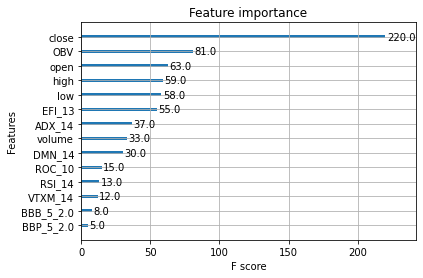

In [17]:
# plot_importance 변수 중요도 시각화
import matplotlib.pyplot as plt
xgb.plot_importance(model01)
plt.show()

In [18]:
train_x

,volume,open,high,low,close,OBV,EFI_13,VTXM_14,ROC_10,DMN_14,BBB_5_2.0,ADX_14,RSI_14,BBP_5_2.0
date,,,,,,,,,,,,,,
2022-03-23,396150.0,13800.0,14100.0,13600.0,13650.0,42438463.0,2.075979e+08,0.842424,6.225681,13.516124,8.314381,20.440277,57.582117,0.360653
2022-03-24,164839.0,13600.0,13700.0,13500.0,13600.0,42273624.0,1.767636e+08,0.913043,5.426357,14.393671,8.062743,21.452135,56.778953,0.302562
2022-03-25,248995.0,13700.0,13950.0,13500.0,13900.0,42522619.0,1.621829e+08,0.872727,8.171206,13.600975,3.520188,22.711743,60.352263,0.851733
2022-03-28,160036.0,13900.0,13900.0,13600.0,13750.0,42362583.0,1.355845e+08,0.901235,9.561753,13.083657,3.115121,23.881378,57.780044,0.593659
2022-03-29,160334.0,13850.0,14000.0,13650.0,13750.0,42362583.0,1.162153e+08,0.868750,7.003891,12.486931,2.999455,25.101498,57.780044,0.548564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-28,135534.0,8570.0,8580.0,8500.0,8520.0,-11706153.0,4.007800e+05,0.949640,-1.160093,13.018217,0.909082,24.599417,46.514283,0.345287
2023-05-02,67407.0,8530.0,8570.0,8520.0,8540.0,-11638746.0,5.361172e+05,0.955224,-1.385681,12.519121,0.749590,24.492620,48.447100,0.531250
2023-05-03,132215.0,8540.0,8620.0,8520.0,8560.0,-11506531.0,8.372861e+05,1.059829,-0.465116,11.564209,0.700521,25.011530,50.378222,0.733854


In [19]:
# 중요도 낮은 하위 5개변수 추가삭제 (train)
drop_col = ['ROC_10', 'RSI_14', 'VTXM_14', 'BBB_5_2.0', 'BBP_5_2.0']
train_x = train_x.drop(columns = drop_col, axis = 1)
train_x

,volume,open,high,low,close,OBV,EFI_13,DMN_14,ADX_14
date,,,,,,,,,
2022-03-23,396150.0,13800.0,14100.0,13600.0,13650.0,42438463.0,2.075979e+08,13.516124,20.440277
2022-03-24,164839.0,13600.0,13700.0,13500.0,13600.0,42273624.0,1.767636e+08,14.393671,21.452135
2022-03-25,248995.0,13700.0,13950.0,13500.0,13900.0,42522619.0,1.621829e+08,13.600975,22.711743
2022-03-28,160036.0,13900.0,13900.0,13600.0,13750.0,42362583.0,1.355845e+08,13.083657,23.881378
2022-03-29,160334.0,13850.0,14000.0,13650.0,13750.0,42362583.0,1.162153e+08,12.486931,25.101498
...,...,...,...,...,...,...,...,...,...
2023-04-28,135534.0,8570.0,8580.0,8500.0,8520.0,-11706153.0,4.007800e+05,13.018217,24.599417
2023-05-02,67407.0,8530.0,8570.0,8520.0,8540.0,-11638746.0,5.361172e+05,12.519121,24.492620
2023-05-03,132215.0,8540.0,8620.0,8520.0,8560.0,-11506531.0,8.372861e+05,11.564209,25.011530


In [20]:
# 중요도 낮은 하위 5개변수 추가삭제 (test)
drop_col = ['ROC_10', 'RSI_14', 'VTXM_14', 'BBB_5_2.0', 'BBP_5_2.0']
test_x = test_x.drop(columns = drop_col, axis = 1)
test_x

,volume,open,high,low,close,OBV,EFI_13,DMN_14,ADX_14
date,,,,,,,,,
2023-05-09,77887.0,8600.0,8710.0,8520.0,8610.0,40770219.0,3.165895e+06,13.154691,26.573859
2023-05-10,26578.0,8620.0,8650.0,8540.0,8600.0,40743641.0,2.675656e+06,12.640987,27.581870
2023-05-11,53660.0,8600.0,8640.0,8500.0,8500.0,40689981.0,1.526848e+06,13.450336,28.169827
2023-05-12,50012.0,8500.0,8540.0,8370.0,8460.0,40639969.0,1.022944e+06,17.376410,27.666941
2023-05-15,35224.0,8410.0,8490.0,8350.0,8450.0,40604745.0,8.264891e+05,17.214586,27.047717
...,...,...,...,...,...,...,...,...,...
2023-05-23,150364.0,8390.0,8390.0,8310.0,8330.0,-11905633.0,-2.119785e+06,21.651061,24.830786
2023-05-24,122457.0,8310.0,8340.0,8280.0,8300.0,-12028090.0,-2.341775e+06,23.012618,25.443523
2023-05-25,84241.0,8300.0,8310.0,8270.0,8310.0,-11943849.0,-1.886891e+06,23.078862,26.128448


In [21]:
# 다시 모델링
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

model01_new = XGBRegressor(max_depth = 3, reg_alpha = 0.1)  # L2
model01_new.fit(train_x, train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [22]:
pred = model01_new.predict(test_x)  # 15일 뒤의 예측 종가(train['target'] 값)
print(pred)
print('---------------')
print(len(pred))
print('---------------')
pred = list(pred)
print(type(pred))

[8231.048  8231.048  8231.048  ... 8096.6226 8096.6226 8096.6226]
---------------
29700
---------------
<class 'list'>


In [23]:
test_y

date
2023-05-09   NaN
2023-05-10   NaN
2023-05-11   NaN
2023-05-12   NaN
2023-05-15   NaN
              ..
2023-05-23   NaN
2023-05-24   NaN
2023-05-25   NaN
2023-05-26   NaN
2023-05-30   NaN
Name: target, Length: 29700, dtype: float64

In [24]:
test['target'] = pred # 15일 뒤의 예측종가
test

,ticker,firm,volume,open,high,low,close,adjustTrue,OBV,EFI_13,VTXM_14,ROC_10,DMN_14,BBB_5_2.0,ADX_14,RSI_14,BBP_5_2.0,target
date,,,,,,,,,,,,,,,,,,
2023-05-09,A000020,동화약품,77887.0,8600.0,8710.0,8520.0,8610.0,1,40770219.0,3.165895e+06,1.028571,1.893491,13.154691,3.447809,26.573859,54.878675,0.744587,8231.047852
2023-05-10,A000020,동화약품,26578.0,8620.0,8650.0,8540.0,8600.0,1,40743641.0,2.675656e+06,1.029508,2.747909,12.640987,2.422913,27.581870,54.177742,0.634815,8231.047852
2023-05-11,A000020,동화약품,53660.0,8600.0,8640.0,8500.0,8500.0,1,40689981.0,1.526848e+06,0.990323,1.674641,13.450336,1.874540,28.169827,47.626729,0.014919,8231.047852
2023-05-12,A000020,동화약품,50012.0,8500.0,8540.0,8370.0,8460.0,1,40639969.0,1.022944e+06,1.022581,0.355872,17.376410,2.775653,27.666941,45.268797,0.120763,7962.163086
2023-05-15,A000020,동화약품,35224.0,8410.0,8490.0,8350.0,8450.0,1,40604745.0,8.264891e+05,1.009615,0.237248,17.214586,3.204762,27.047717,44.673336,0.229110,7962.163086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-23,A383800,LX홀딩스,150364.0,8390.0,8390.0,8310.0,8330.0,1,-11905633.0,-2.119785e+06,1.130769,-2.913753,21.651061,0.777978,24.830786,34.780717,0.130726,8096.622559
2023-05-24,A383800,LX홀딩스,122457.0,8310.0,8340.0,8280.0,8300.0,1,-12028090.0,-2.341775e+06,1.214286,-2.810304,23.012618,1.024426,25.443523,32.654549,0.055122,8096.622559
2023-05-25,A383800,LX홀딩스,84241.0,8300.0,8310.0,8270.0,8310.0,1,-11943849.0,-1.886891e+06,1.241935,-2.235294,23.078862,1.095006,26.128448,34.100667,0.280735,8096.622559


In [25]:
# 2023-05-30 기준 15일 뒤의 예측 종가 데이터만 가져오기
target_date = '2023-05-30'
selected_rows = test.loc[target_date]
selected_rows

,ticker,firm,volume,open,high,low,close,adjustTrue,OBV,EFI_13,VTXM_14,ROC_10,DMN_14,BBB_5_2.0,ADX_14,RSI_14,BBP_5_2.0,target
date,,,,,,,,,,,,,,,,,,
2023-05-30,A000020,동화약품,201361.0,9960.0,10040.0,9640.0,9700.0,1,4.185613e+07,3.565350e+07,0.678922,14.792899,10.894484,4.908308,44.576336,69.822620,0.251035,10580.693359
2023-05-30,A000040,KR모터스,430077.0,704.0,707.0,676.0,680.0,1,2.209727e+08,1.826324e+07,0.893971,-3.818953,14.433513,9.013958,43.716865,51.801336,0.106599,875.761719
2023-05-30,A000050,경방,7087.0,10430.0,10480.0,10350.0,10440.0,1,5.253770e+05,8.590131e+03,1.063830,0.481232,10.718672,1.263975,16.679757,44.245829,0.804290,10817.206055
2023-05-30,A000070,삼양홀딩스,4051.0,72900.0,74000.0,72000.0,72600.0,1,-4.828430e+05,-2.409201e+06,1.054945,-2.941176,21.512464,6.184153,14.086823,41.270779,0.189788,72441.875000
2023-05-30,A000080,하이트진로,412668.0,23700.0,23750.0,22900.0,23000.0,1,1.583871e+06,-8.246990e+06,0.975155,-2.127660,20.497875,5.298637,23.764186,48.965024,0.051411,23229.808594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-30,A375500,DL이앤씨,170274.0,36850.0,37200.0,36200.0,36750.0,1,-4.499666e+06,3.494557e+07,0.908088,4.107649,14.984709,3.936062,29.163379,62.433057,0.674014,36328.734375
2023-05-30,A378850,화승알앤에이,88590.0,4520.0,4580.0,4350.0,4460.0,1,7.118287e+07,-1.091322e+07,0.915989,-6.105263,10.192855,12.991774,46.485222,50.370314,0.230216,4363.640137
2023-05-30,A383220,F&F,151534.0,135000.0,135200.0,131100.0,131700.0,1,9.270410e+05,-1.134464e+08,1.181624,-5.793991,20.428602,6.408677,11.675096,39.049788,0.211600,127358.039062


In [26]:
result01 = selected_rows[['ticker','target']]

In [27]:
result01

,ticker,target
date,,
2023-05-30,A000020,10580.693359
2023-05-30,A000040,875.761719
2023-05-30,A000050,10817.206055
2023-05-30,A000070,72441.875000
2023-05-30,A000080,23229.808594
...,...,...
2023-05-30,A375500,36328.734375
2023-05-30,A378850,4363.640137
2023-05-30,A383220,127358.039062


In [28]:
type(result01)

pandas.core.frame.DataFrame

### 마무리 단계

In [29]:
result01

,ticker,target
date,,
2023-05-30,A000020,10580.693359
2023-05-30,A000040,875.761719
2023-05-30,A000050,10817.206055
2023-05-30,A000070,72441.875000
2023-05-30,A000080,23229.808594
...,...,...
2023-05-30,A375500,36328.734375
2023-05-30,A378850,4363.640137
2023-05-30,A383220,127358.039062


In [30]:
# 예상주가 내림차순 정렬
result01 = result01.sort_values(by='target', ascending=False)

# 순위 저장
result01['순위'] = range(1, len(result01) + 1)
result01

,ticker,target,순위
date,,,
2023-05-30,A207940,826640.187500,1
2023-05-30,A006400,699198.875000,2
2023-05-30,A051910,680038.562500,3
2023-05-30,A003240,613431.187500,4
2023-05-30,A051900,567739.687500,5
...,...,...,...
2023-05-30,A159910,642.172180,1952
2023-05-30,A013720,602.464233,1953
2023-05-30,A042940,600.313782,1954


In [31]:
# missing ticker 확인
df = pd.read_csv('./train.csv')
ticker_all = list(df['종목코드'].unique())
len(ticker_all)   # 2000개
selected_ticker = list(result01['ticker'])
len(selected_ticker)  # 1956개

drop_col = []
for i in ticker_all:
    if i not in selected_ticker:
        drop_col.append(i)

drop_col

['A003560',
 'A099520',
 'A033180',
 'A038530',
 'A014200',
 'A078130',
 'A065560',
 'A214870',
 'A006580',
 'A290380',
 'A078590',
 'A079810',
 'A096640',
 'A257370',
 'A066410',
 'A121800',
 'A007610',
 'A091090',
 'A268600',
 'A136510',
 'A269620',
 'A015540',
 'A238090',
 'A263540',
 'A056090',
 'A005950',
 'A181340',
 'A160600',
 'A101140',
 'A150840',
 'A178780',
 'A044060',
 'A033340',
 'A012600',
 'A223310',
 'A109070',
 'A069110',
 'A062860',
 'A318020',
 'A057880',
 'A053590',
 'A226440',
 'A032860',
 'A215090']

In [32]:
# 데이터프레임 중간에 빈 행 추가
empty_rows = pd.DataFrame([{} for _ in range(44)])
result01 = pd.concat([result01.iloc[:500], empty_rows, result01.iloc[500:]]).reset_index(drop=True)

# 리스트 drop_col을 빈 행의 'ticker' 컬럼에 하나씩 순서대로 넣기
for i, item in enumerate(drop_col):
    result01.at[500 + i, 'ticker'] = item

result01

,ticker,target,순위
0,A207940,826640.187500,1.0
1,A006400,699198.875000,2.0
2,A051910,680038.562500,3.0
3,A003240,613431.187500,4.0
4,A051900,567739.687500,5.0
...,...,...,...
1995,A159910,642.172180,1952.0
1996,A013720,602.464233,1953.0
1997,A042940,600.313782,1954.0
1998,A004410,585.912048,1955.0


In [33]:
# 순위 저장(다시)
result01['순위2'] = range(1, len(result01) + 1)
result01

,ticker,target,순위,순위2
0,A207940,826640.187500,1.0,1
1,A006400,699198.875000,2.0,2
2,A051910,680038.562500,3.0,3
3,A003240,613431.187500,4.0,4
4,A051900,567739.687500,5.0,5
...,...,...,...,...
1995,A159910,642.172180,1952.0,1996
1996,A013720,602.464233,1953.0,1997
1997,A042940,600.313782,1954.0,1998
1998,A004410,585.912048,1955.0,1999


In [34]:
result01 = result01.drop(['순위'], axis = 1)
result01

,ticker,target,순위2
0,A207940,826640.187500,1
1,A006400,699198.875000,2
2,A051910,680038.562500,3
3,A003240,613431.187500,4
4,A051900,567739.687500,5
...,...,...,...
1995,A159910,642.172180,1996
1996,A013720,602.464233,1997
1997,A042940,600.313782,1998
1998,A004410,585.912048,1999


In [35]:
result01.columns

Index(['ticker', 'target', '순위2'], dtype='object')

In [36]:
result01.columns = ['ticker', 'target', '순위']
result01

,ticker,target,순위
0,A207940,826640.187500,1
1,A006400,699198.875000,2
2,A051910,680038.562500,3
3,A003240,613431.187500,4
4,A051900,567739.687500,5
...,...,...,...
1995,A159910,642.172180,1996
1996,A013720,602.464233,1997
1997,A042940,600.313782,1998
1998,A004410,585.912048,1999


In [37]:
# ticker 기준 오름차순 정렬
result01 = result01.sort_values(by='ticker', ascending=True)
result01

,ticker,target,순위
885,A000020,10580.693359,886
1941,A000040,875.761719,1942
854,A000050,10817.206055,855
128,A000070,72441.875000,129
400,A000080,23229.808594,401
...,...,...,...
262,A375500,36328.734375,263
1386,A378850,4363.640137,1387
58,A383220,127358.039062,59
151,A383310,60545.964844,152


In [38]:
# target 열 삭제
result01.drop('target', axis= 1, inplace=True)
result01

,ticker,순위
885,A000020,886
1941,A000040,1942
854,A000050,855
128,A000070,129
400,A000080,401
...,...,...
262,A375500,263
1386,A378850,1387
58,A383220,59
151,A383310,152


In [39]:
# 인덱스 재설정
result01.reset_index(drop=True, inplace=True)
result01

,ticker,순위
0,A000020,886
1,A000040,1942
2,A000050,855
3,A000070,129
4,A000080,401
...,...,...
1995,A375500,263
1996,A378850,1387
1997,A383220,59
1998,A383310,152


In [40]:
# CSV 파일로 저장
file_path = 'model01.csv'
result01.to_csv(file_path, index = False)  # index=False를 지정하면 인덱스를 저장하지 않습니다.